In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


O dataset utilizado tem dados de seguro saúde dos EUA (healsh insurance). \
bmi = body mass index (IMC - índice de massa corporal) \
charges = valores cobrados do seguro saúde

### Questão 1
Obtenha para as mulheres moradoras da região 'northwest' as seguintes informações: \
A) O menor bmi. \
B) O maior bmi. \
C) O bmi médio. \
D) O desvio padrão do bmi. 

In [4]:
df2 = df[(df['region']=='northwest') & (df['sex']=='female')]
print(df2['bmi'].min())
print(df2['bmi'].max())
print(df2['bmi'].mean())
print(df2['bmi'].std())

17.765
42.94
29.277957317073177
5.330559105047061


### Questão 2
Plote um boxplot que comparando o valor gasto (charges) por fumantes e não fumantes.

<Axes: title={'center': 'charges'}, xlabel='smoker'>

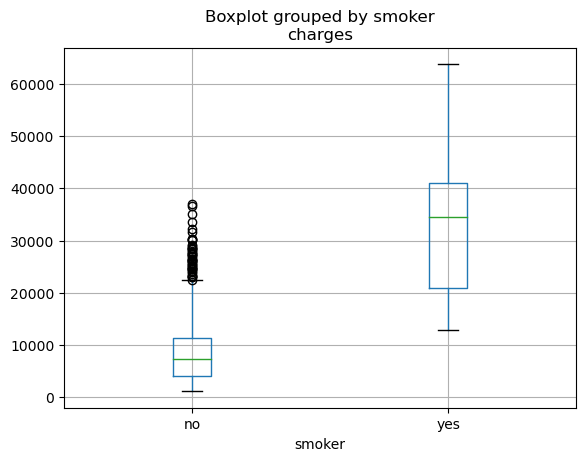

In [5]:
df.boxplot(by="smoker", column =['charges'])

### Questão 3
No início da telefonia havia uma probabilidade de 0,8 sucessos em cada tentativa de realizar uma chamada telefônica. \
a) Calcule a probabilidade de se conseguir exatamente 7 sucessos em 10 tentativas. \
b) Calcule a probabilidade de se conseguir até 7 sucessos em 10 tentativas. \
c) Calcule a probabilidade de se coonseguir mais de 7 sucessos em 10 tentativas.

In [7]:
binom.pmf(7, 10, 0.8)

0.20132659199999978

In [8]:
binom.cdf(7, 10, 0.8)

0.32220047359999987

In [9]:
binom.sf(7, 10, 0.8)

0.6777995264000001

### Questão 4
Suponha que a probabilidade de se ter febre após tomar vacina contra a gripe é 0,005. Considere que 1.000 pessoas tomaram a vacina. Calcule: \
a) A probabilidade de 1 pessoa ter febre. \
b) A probabilidade de 6 ou mais pessoas terem febre.

In [10]:
poisson.pmf(1, 5)

0.03368973499542734

In [11]:
poisson.sf(6, 5)

0.2378165370270613

### Questão 5 [valor: 1,0]
Um restaurante serve 150 refeições todas as noites. Os garçons servem 6 pratos errados por noite, ou seja 4% dos pedidos resultam em falha (6/150 = 0.04). Qual é a probabilidade de que uma dada noite tenha uma taxa de sucesso de 99%?

Para termos uma taxa de sucesso de 99%, deve haver apenas 1,5 erros, o que equivale a 1%. Mas como estamos trabalhando com uma distribuição discreta, vamos arredondar para 2 erros. Portanto, estamos trabalhando com 148 acertos em 150. Queremos também calcular a probabilidade cumulativa, pois são pelo menos 148 ordens corretas. Portanto, o cálculo precisa ser P(148) + P(149) + P(150). A solução direta é pela função sf, mas podemos fazer também 1 - cdf.

In [ ]:
round(binom.sf(147, 150, 0.96), 4)

In [ ]:
round(1 - round(binom.cdf(147, 150, 0.96), 4), 4)

### Questão 6 
Uma linha de produção está sendo analisada para efeito de controle de qualidade das peças produzidas. Tendo em vista o alto padrão requerido, a produção é interrompida para regulagem toda vez que uma peça defeituosa é observada. Se 0,01 é a probabilidade da peça ser defeituosa, estude o comportamento da variável Q, quantidades de peças boas produzidas antes da primeira defeituosa. Para tanto, simule a geração de peças e conte quantas são produzidas até que a primeira defeituosa seja encontrada. Repita o processo 1.000 vezes e calcule a média.
A média vai representar o número de peças boas são produzidas até que uma peça defeituosa seja produzida. 

In [ ]:
lista_cont = []
for i in range(1000):
    cont = 0
    while True:
        if np.random.binomial(1, 0.01) == 0:
            cont = cont+1
        else:
            break
    lista_cont.append(cont)
    #print(cont)
vet = np.array(lista_cont)
vet.mean()

#Q = np.random.geometric(p=0.01,size=1000).mean()
#print(Q)

### Questão 7 [valor: 1,0]
Nos últimos 100 anos, ocorreram 93 terremotos de intensidade 6,0 ou mais na escala Richter. Qual é a probabilidade de ocorrerem 3 terremotos no mesmo ano e todos de intensidade 6,0 ou mais?

In [ ]:
round(poisson.pmf(3, 0.93), 4)